In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [4]:
df = pd.read_csv('BankChurners.csv')

print(f"Dataset loaded successfully!")
print(f"\n Number of customers: {len(df)}")
print(f"\n Number of features: {len(df.columns)}")
print("\n Dataset:")
df.head(25)

Dataset loaded successfully!

 Number of customers: 10127

 Number of features: 23

 Dataset:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.999960
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.999700


In [5]:
import pandas as pd

summary_table = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.astype(str),
    "Non-Null Count": df.notnull().sum().values
})

summary_table.index = range(1, len(summary_table) + 1)

print("Column Names and Data Types:\n")
summary_table

Column Names and Data Types:



,Column Name,Data Type,Non-Null Count
1,CLIENTNUM,int64,10127
2,Attrition_Flag,str,10127
3,Customer_Age,int64,10127
4,Gender,str,10127
5,Dependent_count,int64,10127
6,Education_Level,str,10127
7,Marital_Status,str,10127
8,Income_Category,str,10127
9,Card_Category,str,10127
10,Months_on_book,int64,10127


In [6]:
print("\nBasic Statistics About Each Column:\n")

df_no_id = df.drop(columns=["CLIENTNUM"])

basic_stats = df_no_id.describe().T

basic_stats = basic_stats.rename(columns={
    "count": "Count",
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Minimum",
    "25%": "First Quartile (Q1)",
    "50%": "Median (Q2)",
    "75%": "Third Quartile (Q3)",
    "max": "Maximum"
})

basic_stats


Basic Statistics About Each Column:



,Count,Mean,Standard Deviation,Minimum,First Quartile (Q1),Median (Q2),Third Quartile (Q3),Maximum
Customer_Age,10127.0,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.00000
Dependent_count,10127.0,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.00000
Months_on_book,10127.0,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.00000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.00000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.00000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.00000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.00000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.00000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.00000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.39700


In [26]:
# Check for missing values
print("Checking for missing values:")

total_missing = df.isnull().sum().sum()

if total_missing == 0:
    print("\n  No missing values! Data is clean!")
    
else:
    print(f"\n Found {total_missing} missing values:")
    missing = df.isnull().sum()
    for col, count in missing[missing > 0].items():
        pct = (count / len(df)) * 100
        print(f"   {col}: {count} ({pct:.2f}%)")

Checking for missing values:

  No missing values! Data is clean!


 Churn Distribution:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

 Churn Percentage:
Attrition_Flag
Existing Customer    83.93
Attrited Customer    16.07
Name: proportion, dtype: float64


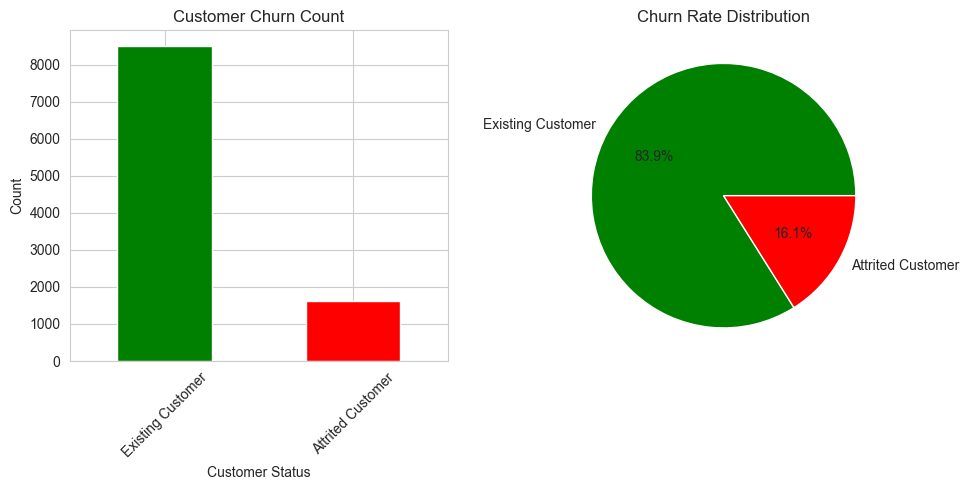


 Insight: 16.1% of customers have churned!


In [7]:
print(" Churn Distribution:")
print(df['Attrition_Flag'].value_counts())

print("\n Churn Percentage:")
churn_rate = (df['Attrition_Flag'].value_counts(normalize=True) * 100).round(2)
print(churn_rate)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Attrition_Flag'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Customer Churn Count')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Churn Rate Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\n Insight: {churn_rate.iloc[1]:.1f}% of customers have churned!")

In [16]:
#Comparing churners vs non-churners
print("\nKey Metrics by Churn Status:")
numeric_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']

comparison = df.groupby('Attrition_Flag')[numeric_cols].mean()
print(comparison.round(2))

# Gender distribution
print("\n\nChurn by Gender:")
print(pd.crosstab(df['Gender'], df['Attrition_Flag'], normalize='index') * 100)

# Card category
print("\n\nChurn by Card Category:")
print(pd.crosstab(df['Card_Category'], df['Attrition_Flag'], normalize='index') * 100)


Key Metrics by Churn Status:
                   Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer         46.66             2.40           36.18   
Existing Customer         46.26             2.34           35.88   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                      3.28                    2.69   
Existing Customer                      3.91                    2.27   

                   Credit_Limit  Total_Trans_Amt  Total_Trans_Ct  
Attrition_Flag                                                    
Attrited Customer       8136.04          3095.03           44.93  
Existing Customer       8726.88          4654.66           68.67  


Churn by Gender:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                  

In [15]:
print("\n Sample data set of key features:\n")
df_display = df.copy()
df_display.index = df_display.index + 1

display(df_display.head(10))


 Sample data set of key features:



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
7,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
8,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
9,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
10,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970
